# Housing price prediction

#### ***About Data Set :***
The dataset consists of Price of Houses, from sales between May 2014 and May 2015. Along with house price it consists of information on **21 house features, date of sale and ID of sale.**

The dataset consists of information on **22,000 properties.**

#### ***Objective :***
Main objective is to build a **model that will predict the price of a house** based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

***Attribute information***
1. id - Unique id for each home sold
2. date - Date of the home saled
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft _ living - Square footage of the apartments interior living space
7. sqft _ lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - an index from 1 to 5 on the condition of the apartment
12. grade - An index from 1 to 13 , where 1-3falls short of building construction and design, 7 has an average level of construction and design , and 11-13 have a high quality level of construction and design
13. sqft _ above - the square footage of the interior housing space that is above ground level
14. sqft _ basement - the square footage of the inerior housing space that is below ground level
15. yr _ built - The year of the house was initially built
16. yr _ renovated - The year of the house's last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft _ living15 - The square footage of inerior housing living space for the nearest nearest 15 neighbours
21. sqft _ lot15 - the square footage of the land lots of the nearest 15 neighbours

## 1. Imporing Libraries and Data

In [1]:
# Importing necessary liabraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading a dataset
data = pd.read_excel("regression_data.xls")

In [3]:
# Reading a data
data.head(20)

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1   6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2   5631500400 2015-02-25         2       1.00          770     10000     1.0   
3   2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4   1954400510 2015-02-18         3       2.00         1680      8080     1.0   
5   7237550310 2014-05-12         4       4.50         5420    101930     1.0   
6   1321400060 2014-06-27         3       2.25         1715      6819     2.0   
7   2008000270 2015-01-15         3       1.50         1060      9711     1.0   
8   2414600126 2015-04-15         3       1.00         1780      7470     1.0   
9   3793500160 2015-03-12         3       2.50         1890      6560     2.0   
10  1736800520 2015-04-03         3       2.50         3560      9796     1.0   
11  9212900260 2014-05-27         2       1.00         1160      6000     1.0   
12   114101516 2014-05-28         3       1.00         1430     19901     1.5   
13  6054650070 2014-10-07         3       1.75         1370      9680     1.0   
14  1175000570 2015-03-12         5       2.00         1810      4850     1.5   
15  9297300055 2015-01-24         4       3.00         2950      5000     2.0   
16  1875500060 2014-07-31         3       2.00         1890     14040     2.0   
17  6865200140 2014-05-29         4       1.00         1600      4300     1.5   
18    16000397 2014-12-05         2       1.00         1200      9850     1.0   
19  7983200060 2015-04-24         3       1.00         1250      9774     1.0   

    waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0            0     0          3  ...        1180              0      1955   
1            0     0          3  ...        2170            400      1951   
2            0     0          3  ...         770              0      1933   
3            0     0          5  ...        1050            910      1965   
4            0     0          3  ...        1680              0      1987   
5            0     0          3  ...        3890           1530      2001   
6            0     0          3  ...        1715              0      1995   
7            0     0          3  ...        1060              0      1963   
8            0     0          3  ...        1050            730      1960   
9            0     0          3  ...        1890              0      2003   
10           0     0          3  ...        1860           1700      1965   
11           0     0          4  ...         860            300      1942   
12           0     0          4  ...        1430              0      1927   
13           0     0          4  ...        1370              0      1977   
14           0     0          3  ...        1810              0      1900   
15           0     3          3  ...        1980            970      1979   
16           0     0          3  ...        1890              0      1994   
17           0     0          4  ...        1600              0      1916   
18           0     0          4  ...        1200              0      1921   
19           0     0          4  ...        1250              0      1969   

    yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0              0    98178  47.5112 -122.257           1340        5650   
1           1991    98125  47.7210 -122.319           1690        7639   
2              0    98028  47.7379 -122.233           2720        8062   
3              0    98136  47.5208 -122.393           1360        5000   
4              0    98074  47.6168 -122.045           1800        7503   
5              0    98053  47.6561 -122.005           4760      101930   
6              0    98003  47.3097 -122.327           2238        6819   
7              0    98198  47.4095 -122.315           1650        9711   
8              0    98146 

### Checking insights of data set

In [4]:
data.shape

(21597, 21)

 - It has **21597 rows** and **21 columns**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

 - There are total **21597 entries**
 - There are **no null** values
 - There are total **16 numeric integer, 4 numeric floating and 1 date time** variables
 - We can **drop id** column as it's unique and not contributing anything to predict the housing prices.

## 2. Analysis and Visualization

In [6]:
#Checking duplicats
data.duplicated().sum()

0

 - There are **no duplocate** values

#### Checking unique values of each column

In [7]:
# Checking data set columns
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
# Checking unique value counts of 'date' column.
data['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

In [9]:
# Checking unique value counts of 'bedrooms' column.
data['bedrooms'].value_counts() # Number of bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
# Checking unique value counts of 'bathrooms' column.
data['bathrooms'].value_counts() # Number of bathrooms

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [11]:
# Checking unique value counts of 'sqft_living' column.
data['sqft_living'].value_counts() # Square footage of the apartments interior living space - carpet area

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [12]:
# Checking unique value counts of 'sqft_lot' column.
data['sqft_lot'].value_counts() # Square footage of the land space - built up area

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64

In [13]:
# Checking unique value counts of 'waterfront' column.
data['waterfront'].value_counts() # A dummy variable for whether the apartment was overlooking the waterfront or not

0    21434
1      163
Name: waterfront, dtype: int64

In [14]:
# Checking unique value counts of 'view' column.
data['view'].value_counts() # An index from 0 to 4 of how good the view of the property was

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [15]:
# Checking unique value counts of 'condition' column.
data['condition'].value_counts() # an index from 1 to 5 on the condition of the apartment

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [16]:
# Checking unique value counts of 'grade' column.
data['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

 - An index from 1 to 13 , where 1-3 falls short of building construction and design, 
 - 7 has an average level of construction and design , 
 - 11-13 have a high quality level of construction and design

In [17]:
# Checking unique value counts of 'sqft_above' column.
data['sqft_above'].value_counts() # the square footage of the interior housing space that is above ground level

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [18]:
# Checking unique value counts of 'sqft_basement' column.
data['sqft_basement'].value_counts() # the square footage of the inerior housing space that is below ground level

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [19]:
# Checking unique value counts of 'yr_built' column.
data['yr_built'].value_counts() # The year of the house was initially built

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [20]:
# Checking unique value counts of 'yr_renovated' column.
data['yr_renovated'].value_counts() # The year of the house's last renovation

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
# Checking unique value counts of 'zipcode' column.
data['zipcode'].value_counts() # What zipcode area the house is in

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
# Checking unique value counts of 'lattitude' column.
data['lat'].value_counts() # Lattitude

47.5491    17
47.6846    17
47.5322    17
47.6624    17
47.6711    16
           ..
47.1976     1
47.3013     1
47.6139     1
47.4184     1
47.6502     1
Name: lat, Length: 5033, dtype: int64

In [23]:
# Checking unique value counts of 'longititude' column.
data['long'].value_counts() # Longitude

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.459      1
-121.726      1
-121.819      1
-122.440      1
-121.403      1
Name: long, Length: 751, dtype: int64

In [24]:
# Checking unique value counts of 'sqft_living15' column.
data['sqft_living15'].value_counts() # The square footage of inerior housing living space for the nearest nearest 15 neighbours

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [25]:
# Checking unique value counts of 'sqft_lot15' column.
data['sqft_lot15'].value_counts() # the square footage of the land lots of the nearest 15 neighbours

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [26]:
# checking house with prices zero
(data.price == 0).sum()

0

In [27]:
# Checking statistics of the dataset
data.describe().T

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06

In [28]:
# checking for unique values in each column
data.nunique(axis = 0) 

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [29]:
# Converting a square feet values into square meter
data['sqft_lot'] = data['sqft_lot'].apply(lambda x: x*0.092903)
data['sqft_living'] = data['sqft_living'].apply(lambda x: x*0.092903)
data['sqft_above'] = data['sqft_above'].apply(lambda x: x*0.092903)
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: x*0.092903)
data['sqft_living15'] = data['sqft_living15'].apply(lambda x: x*0.092903)
data['sqft_lot15'] = data['sqft_lot15'].apply(lambda x: x*0.092903)
data

id       date  bedrooms  bathrooms  sqft_living    sqft_lot  \
0      7129300520 2014-10-13         3       1.00    109.62554  524.901950   
1      6414100192 2014-12-09         3       2.25    238.76071  672.803526   
2      5631500400 2015-02-25         2       1.00     71.53531  929.030000   
3      2487200875 2014-12-09         4       3.00    182.08988  464.515000   
4      1954400510 2015-02-18         3       2.00    156.07704  750.656240   
...           ...        ...       ...        ...          ...         ...   
21592   263000018 2014-05-21         3       2.50    142.14159  105.073293   
21593  6600060120 2015-02-23         4       2.50    214.60593  540.045139   
21594  1523300141 2014-06-23         2       0.75     94.76106  125.419050   
21595   291310100 2015-01-16         3       2.50    148.64480  221.852364   
21596  1523300157 2014-10-15         2       0.75     94.76106   99.963628   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...   109.62554        0.00000   
1         2.0           0     0          3  ...   201.59951       37.16120   
2         1.0           0     0          3  ...    71.53531        0.00000   
3         1.0           0     0          5  ...    97.54815       84.54173   
4         1.0           0     0          3  ...   156.07704        0.00000   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...   142.14159        0.00000   
21593     2.0           0     0          3  ...   214.60593        0.00000   
21594     2.0           0     0          3  ...    94.76106        0.00000   
21595     2.0           0     0          3  ...   148.64480        0.00000   
21596     2.0           0     0          3  ...    94.76106        0.00000   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257      124.49002   
1          1951          1991    98125  47.7210 -122.319      157.00607   
2          1933             0    98028  47.7379 -122.233      252.69616   
3          1965             0    98136  47.5208 -122.393      126.34808   
4          1987             0    98074  47.6168 -122.045      167.22540   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346      142.14159   
21593      2014             0    98146  47.5107 -122.362      170.01249   
21594      2009             0    98144  47.5944 -122.299       94.76106   
21595      2004             0    98027  47.5345 -122.069      130.99323   
21596      2008             0    98144  47.5941 -122.299       94.76106   

       sqft_lot15   price  
0      524.901950  221900  
1      709.686017  538000  
2      748.983986  180000  
3      464.515000  604000  
4      697.051209  510000  
...           ...     ...  
21592  140.190627  360000  
21593  668.901600  400000  
21594  186.456321  402101  
21595  119.566161  400000  
21596  126.069371  325000  

[21597 rows x 21 columns]

In [30]:
# Making a copy of original dataset
df_houses = data.copy()

In [31]:
df_houses.head()

id       date  bedrooms  bathrooms  sqft_living    sqft_lot  \
0  7129300520 2014-10-13         3       1.00    109.62554  524.901950   
1  6414100192 2014-12-09         3       2.25    238.76071  672.803526   
2  5631500400 2015-02-25         2       1.00     71.53531  929.030000   
3  2487200875 2014-12-09         4       3.00    182.08988  464.515000   
4  1954400510 2015-02-18         3       2.00    156.07704  750.656240   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.0           0     0          3  ...   109.62554        0.00000   
1     2.0           0     0          3  ...   201.59951       37.16120   
2     1.0           0     0          3  ...    71.53531        0.00000   
3     1.0           0     0          5  ...    97.54815       84.54173   
4     1.0           0     0          3  ...   156.07704        0.00000   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257      124.49002   
1      1951          1991    98125  47.7210 -122.319      157.00607   
2      1933             0    98028  47.7379 -122.233      252.69616   
3      1965             0    98136  47.5208 -122.393      126.34808   
4      1987             0    98074  47.6168 -122.045      167.22540   

   sqft_lot15   price  
0  524.901950  221900  
1  709.686017  538000  
2  748.983986  180000  
3  464.515000  604000  
4  697.051209  510000  

[5 rows x 21 columns]

In [32]:
df_houses.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [33]:
# Checking correlation of dataset
a = df_houses.corr()

In [34]:
a

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000  0.001150   0.005162    -0.012241 -0.131911  0.018608   
bedrooms       0.001150  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.005162  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living   -0.012241  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot      -0.131911  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.018608  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront    -0.002727 -0.006834   0.063744     0.103854  0.021632  0.023755   
view           0.011536  0.080008   0.188386     0.284709  0.074900  0.028814   
condition     -0.023803  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.008188  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above    -0.010799  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement -0.005193  0.302808   0.283440     0.435130  0.015418 -0.245715   
yr_built       0.021617  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated  -0.016925  0.018389   0.050544     0.055308  0.007686  0.006427   
zipcode       -0.008211 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat           -0.001798 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.020672  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15 -0.002701  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15    -0.138557  0.030690   0.088303     0.184342  0.718204 -0.010722   
price         -0.016772  0.308787   0.525906     0.701917  0.089876  0.256804   

               waterfront      view  condition     grade  sqft_above  \
id              -0.002727  0.011536  -0.023803  0.008188   -0.010799   
bedrooms        -0.006834  0.080008   0.026496  0.356563    0.479386   
bathrooms        0.063744  0.188386  -0.126479  0.665838    0.686668   
sqft_living      0.103854  0.284709  -0.059445  0.762779    0.876448   
sqft_lot         0.021632  0.074900  -0.008830  0.114731    0.184139   
floors           0.023755  0.028814  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.401971   0.016611  0.082888    0.072109   
view             0.401971  1.000000   0.045999  0.251728    0.167609   
condition        0.016611  0.045999   1.000000 -0.146896   -0.158904   
grade            0.082888  0.251728  -0.146896  1.000000    0.756073   
sqft_above       0.072109  0.167609  -0.158904  0.756073    1.000000   
sqft_basement    0.080559  0.277078   0.173849  0.168220   -0.052156   
yr_built        -0.026153 -0.053636  -0.361592  0.447865    0.424037   
yr_renovated     0.092873  0.103951  -0.060788  0.014261    0.023251   
zipcode          0.030272  0.084622   0.002888 -0.185771   -0.261570   
lat             -0.014306  0.005871  -0.015102  0.113575   -0.001199   
long            -0.041904 -0.078107  -0.105877  0.200341    0.344842   
sqft_living15    0.086507  0.280681  -0.093072  0.713867    0.731767   
sqft_lot15       0.030781  0.072904  -0.003126  0.120981    0.195077   
price            0.266398  0.397370   0.036056  0.667951    0.605368   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                 -0.005193  0.021617     -0.016925 -0.008211 -0.001798   
bedrooms            0.302808  0.155670      0.018389 -0.154092 -0.009951   
bathrooms           0.283440  0.507173      0.050544 -0.204786  0.024280   
sqft_living         0.435130  0.318152      0.055308 -0.199802  0.052155   
sqft_lot            0.015418  0.052946      0.007686 -0.129586 -0.085514   
floors             -0.245715  0.489193      0.006427 -0.059541  0.049239   
waterfront          0.080559 -0.026153      0.092873  0.030272 -0.014306   
view                0.277078 -0.053636      0.103951  0.084622  0.005871   
condition           0.173849 -0.361592     -0.060788  0.002888 -0.015102   
grade               0.168220  0.447865      0.

<Axes: >

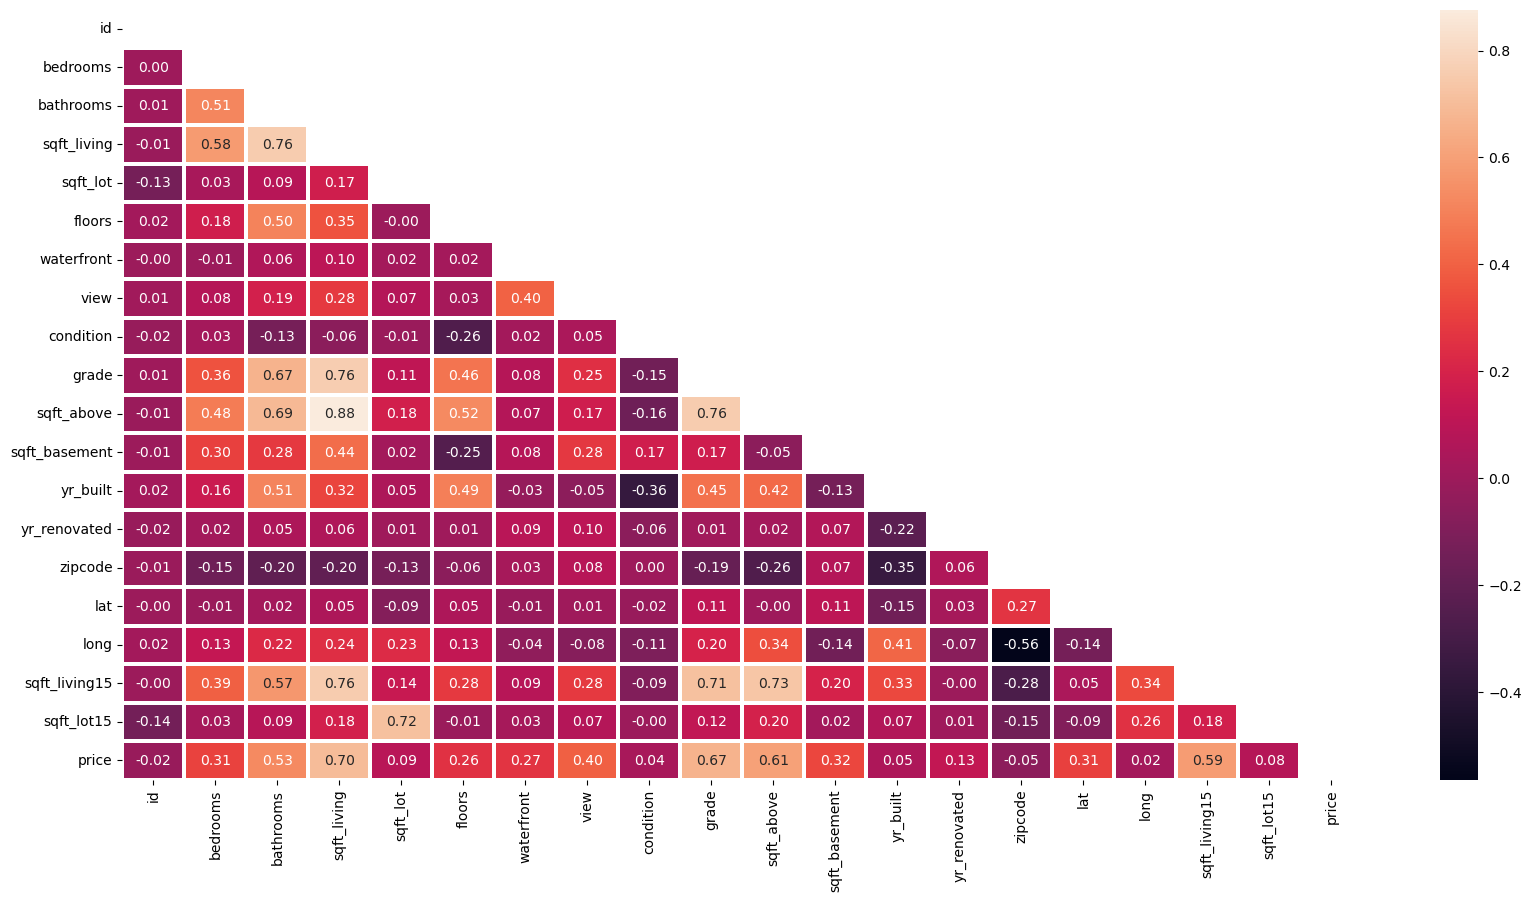

In [35]:
# Plotting a correlation
plt.figure(figsize=(20,10))
mask = np.zeros_like(a, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_houses.corr(),linewidths=1.5,mask=mask
            ,annot=True,fmt='.2f')

 - There is no multicolinarity among the individual vaiables.

In [36]:
# Checking the correlation with target column 'Price'
df_houses.corr()['price']

id              -0.016772
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
price            1.000000
Name: price, dtype: float64

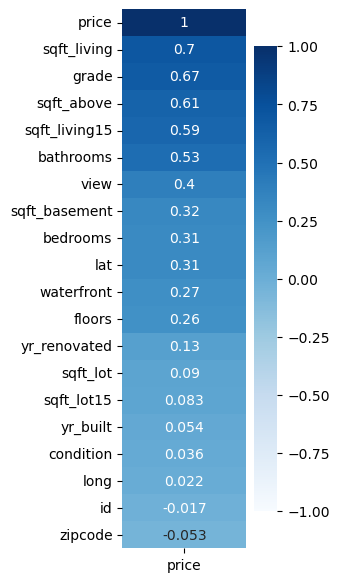

In [37]:
# Plotting correlation with price column
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

In [38]:
# Checking highly correlated columns with target
b = df_houses.corr()['price'][(df_houses.corr()['price']>=0.5) | (df_houses.corr()['price']<=-0.5) ]

In [39]:
b

bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
price            1.000000
Name: price, dtype: float64

<Axes: >

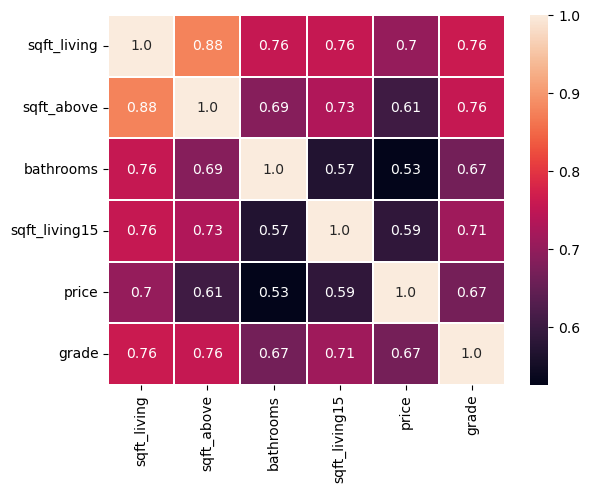

In [40]:
# Plotting the highly correlated columns with target
sns.heatmap(df_houses[['sqft_living','sqft_above','bathrooms','sqft_living15','price','grade']].corr(),linewidths=1.4,annot=True,fmt='.2')

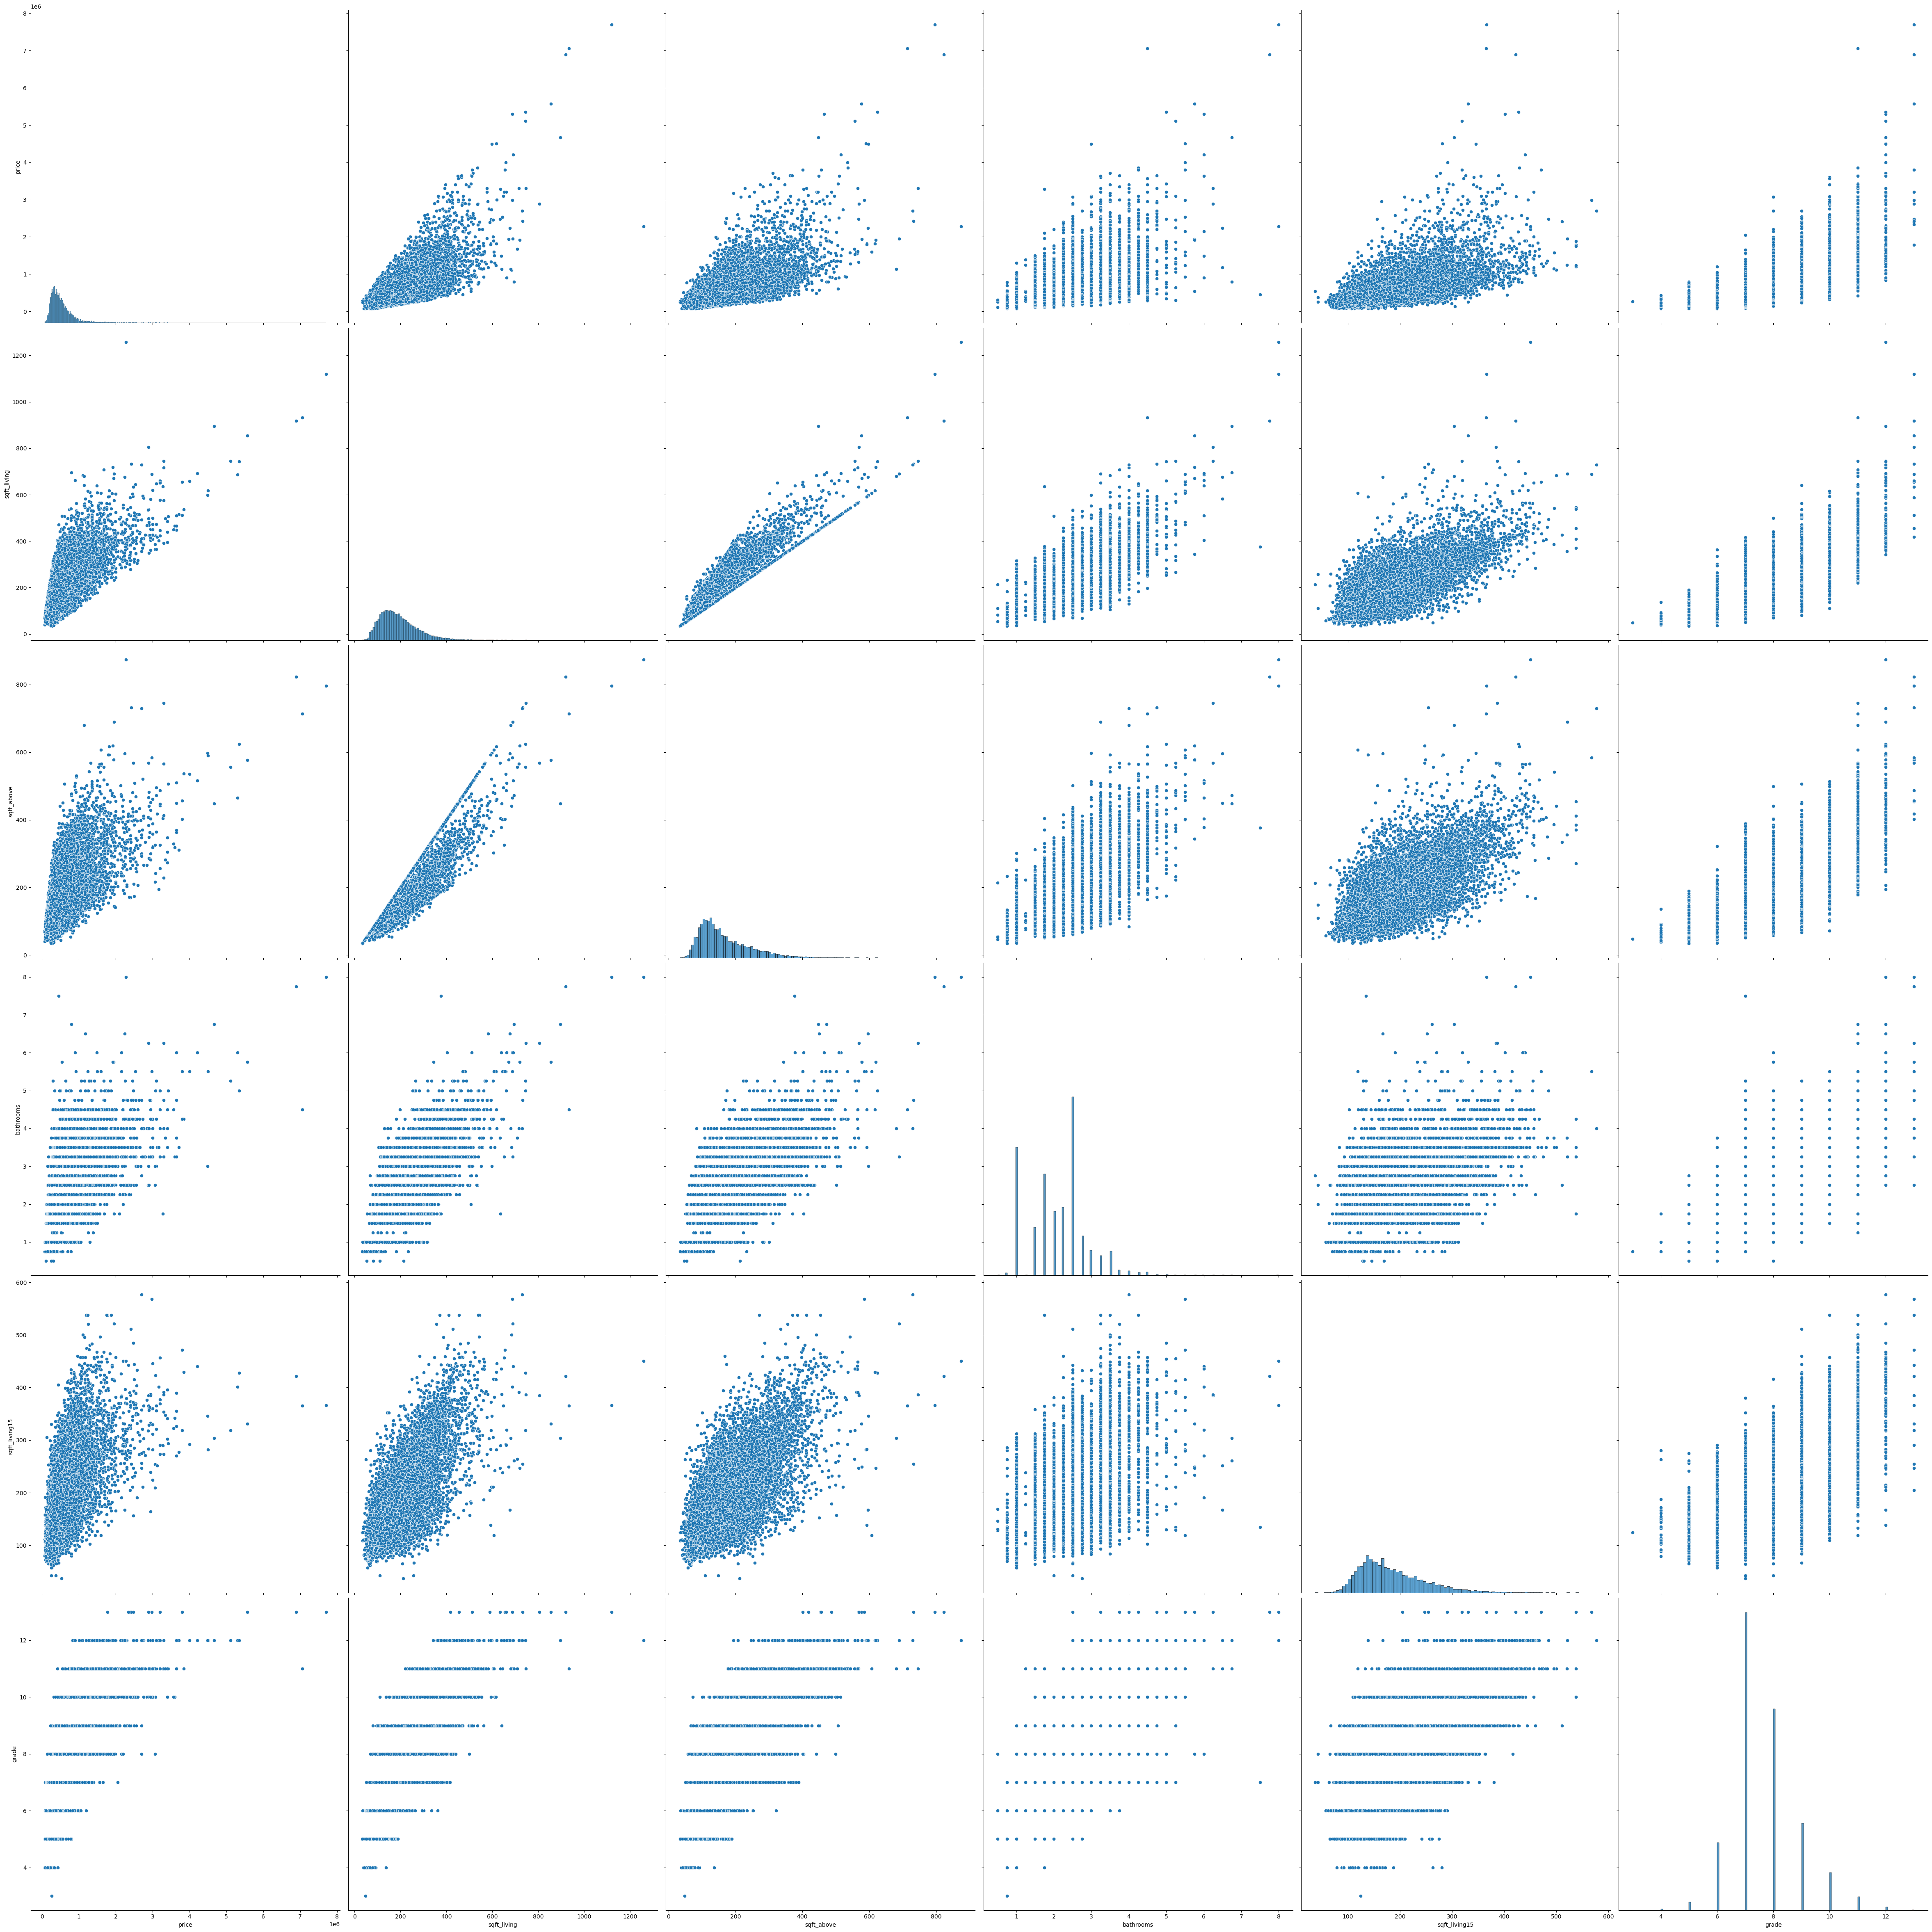

In [41]:
# Plotting pairplot to see the individual column relationship

sns.pairplot(df_houses[['price','sqft_living','sqft_above','bathrooms','sqft_living15','grade']],height=8)

### Visualizing the distribution of the columns using KDE plot


It is used to plot the data against a single/univariate variable. 
It represents the probability distribution of the data values as the area under the plotted curve.

#### 'price' column

<Axes: xlabel='price', ylabel='Density'>

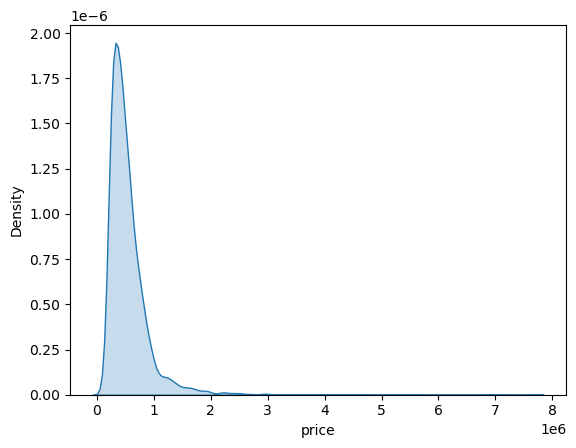

In [42]:
sns.kdeplot(x=df_houses['price'],shade=True)

#### 'sqft_basement' column

<Axes: xlabel='sqft_basement', ylabel='Density'>

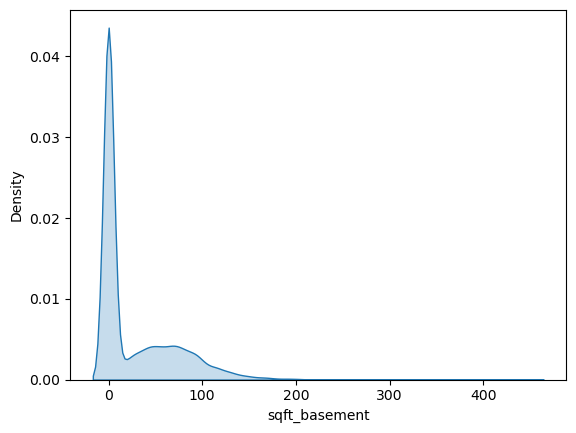

In [43]:
sns.kdeplot(x=df_houses['sqft_basement'],shade = True)

#### 'sqft_living' column

<Axes: xlabel='sqft_living', ylabel='Density'>

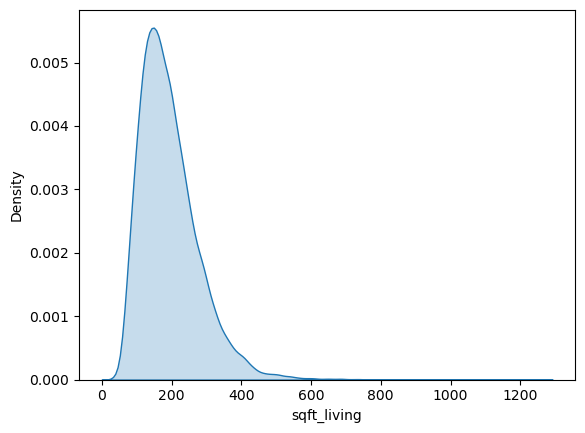

In [44]:
sns.kdeplot(x=df_houses['sqft_living'],shade = True)

#### 'sqft_living15' column

<Axes: xlabel='sqft_living15', ylabel='Density'>

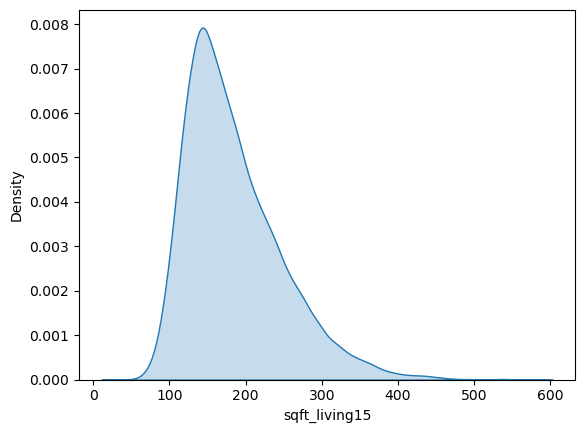

In [45]:
sns.kdeplot(x=df_houses['sqft_living15'],shade = True)

#### 'sqft_above' column

<Axes: xlabel='sqft_above', ylabel='Density'>

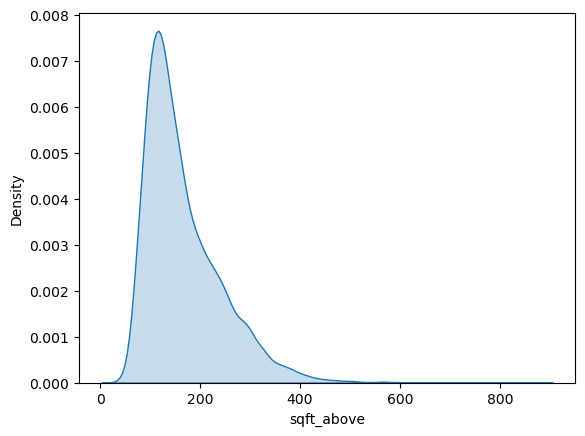

In [46]:
sns.kdeplot(x=df_houses['sqft_above'],shade=True)

#### House Grades against the interior living space of the houses

Text(0, 0.5, 'Interior leaving space')

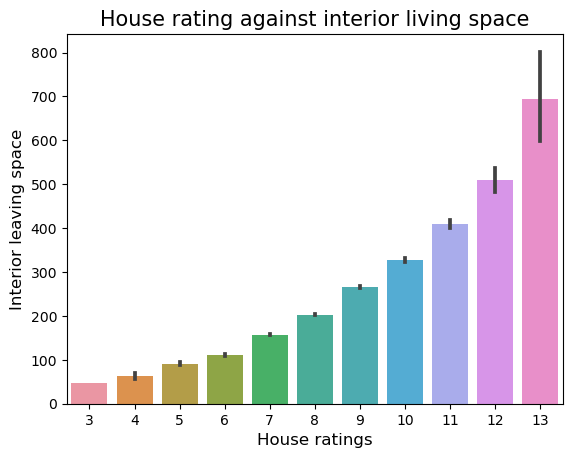

In [47]:
sns.barplot(y=df_houses['sqft_living'],x=df_houses['grade'])
plt.title('House rating against interior living space',fontsize = 15)
plt.xlabel('House ratings',fontsize = 12)
plt.ylabel('Interior leaving space',fontsize = 12)

Grading works like - An index from 1 to 13 , where 1-3falls short of building construction and design, 7 has an average level of construction and design , and 11-13 have a high quality level of construction and design

 - We can see that there are no houses rated in 0-1 grade.
 - Most of the houses are having a high quality level of construction and design.

#### House Grades against the square footage of the land space.

Text(0, 0.5, 'Square meter of the land space')

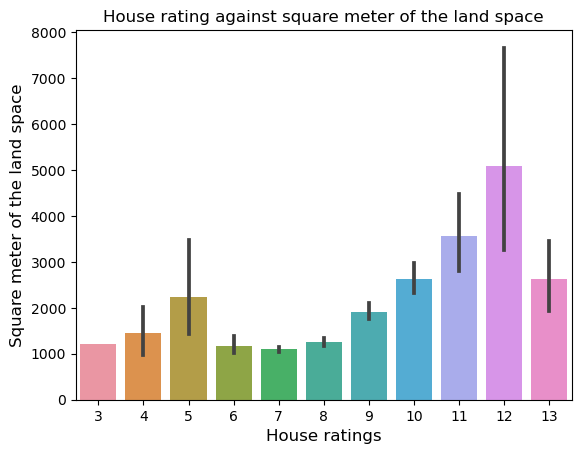

In [48]:
sns.barplot(y=df_houses['sqft_lot'],x=df_houses['grade'])
plt.title('House rating against square meter of the land space',fontsize = 12)
plt.xlabel('House ratings',fontsize = 12)
plt.ylabel('Square meter of the land space',fontsize = 12)

 - Grade 12 is having largest square meter of the land space where as grade 7 is having the smallest square meter of the land space

#### Price against the number of bedrooms

Text(0, 0.5, 'Price')

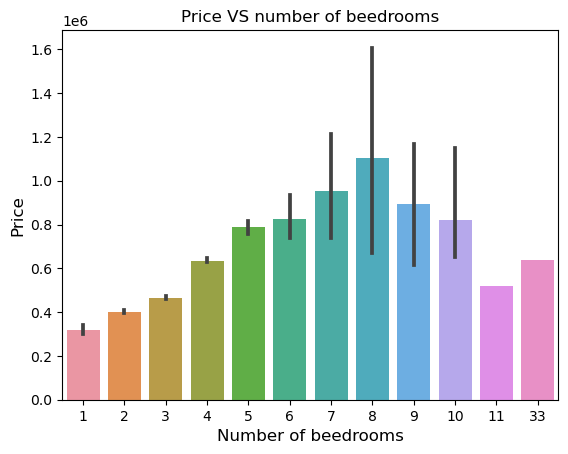

In [49]:
sns.barplot(x=df_houses['bedrooms'],y=df_houses['price'])
plt.title('Price VS number of beedrooms',fontsize = 12)
plt.xlabel('Number of beedrooms',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - 8 beedroom house is having the highest price and the lowest price is for 1 beedroom house.

#### Price against the number of bathrooms

Text(0, 0.5, 'Price')

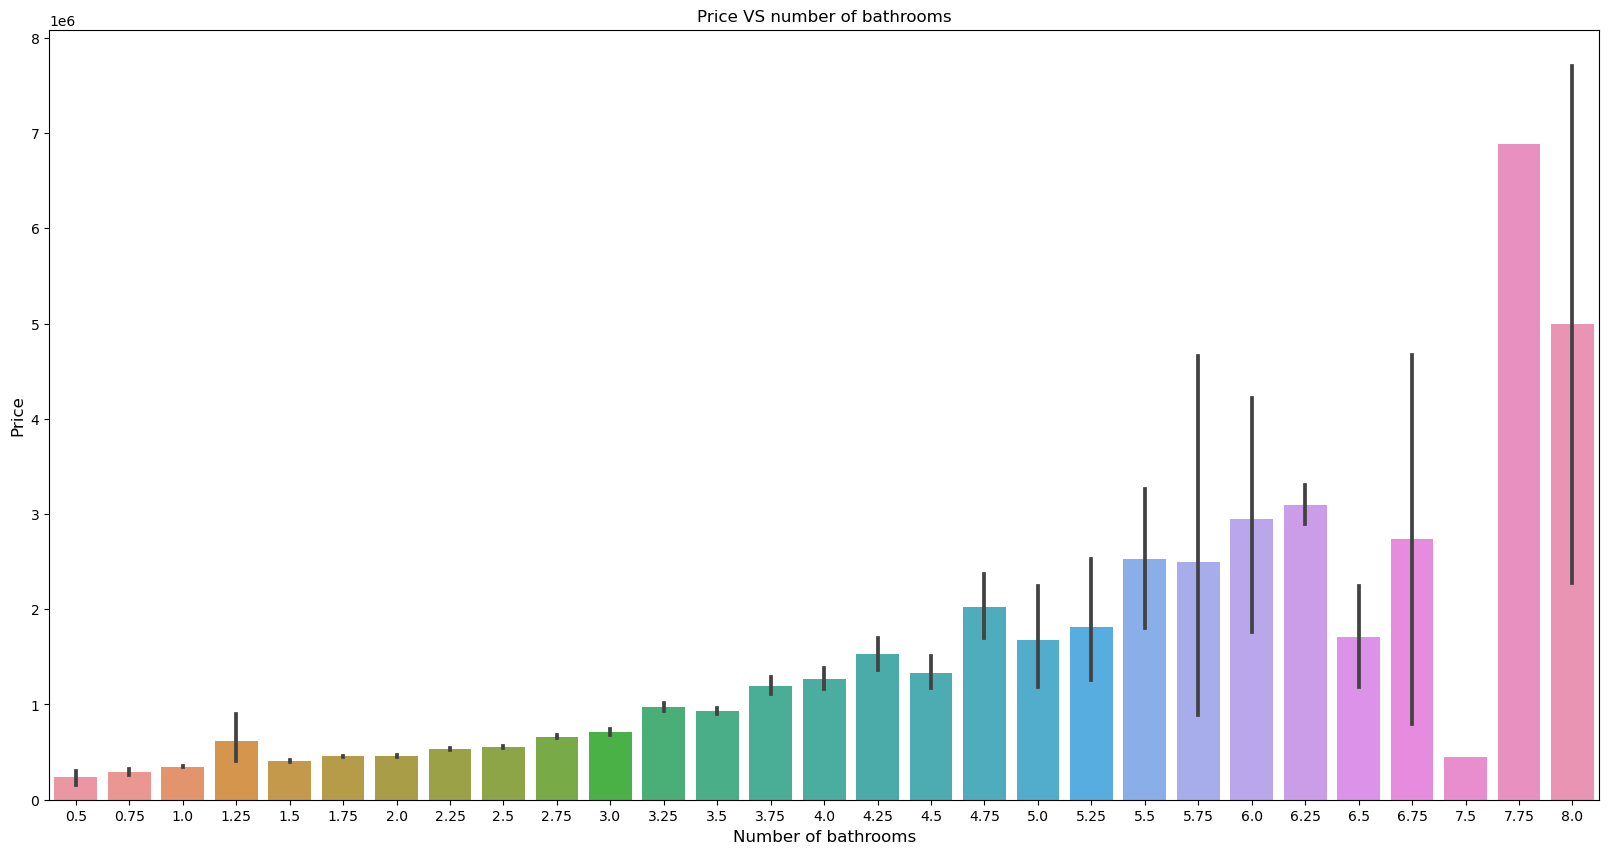

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_houses['bathrooms'],y=df_houses['price'])
plt.title('Price VS number of bathrooms',fontsize = 12)
plt.xlabel('Number of bathrooms',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - A **0.5** bathroom means **that has a sink and a toilet, but no shower or bath**
 - A **0.75** bathroom means **that contains one sink, one toilet and a shower or a bath.**
 - A **1** bathroom means **consists of four parts: a sink, shower, bathtub and toilet.**
 - A **1.5** bathroom means **the house has one full bathroom and one half-bathroom.** (a half bath only has a toilet and sink)
 
This is how the distribution of the bathrooms works in this data set.

REFERENCE: https://community.withairbnb.com/t5/Advice-on-your-space/How-to-calculate-Bathrooms/td-p/1437848

#### Price against the number of floors

Text(0, 0.5, 'Price')

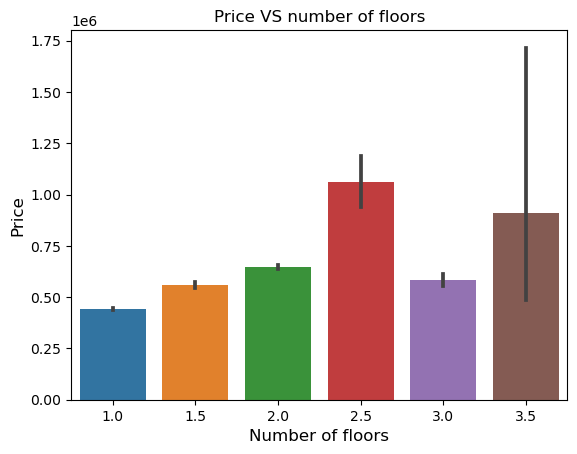

In [51]:
sns.barplot(x=df_houses['floors'],y = df_houses['price'])
plt.title('Price VS number of floors',fontsize = 12)
plt.xlabel('Number of floors',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - A **2.5** floor houses are having high prices.(A 2.5 story is a residence with three levels of living area characterized by a steep roof slope and dormers (which project from the roof and have windows on their fronts). Because of the roof design, the area of the third floor is usually 40% to 70% of the ground floor area.)
 
REFERENCE : https://rct9.msbexpress.net/RCT44Help/1/Content/Style_1_Story.htm

#### Price against the house view

Text(0, 0.5, 'Price')

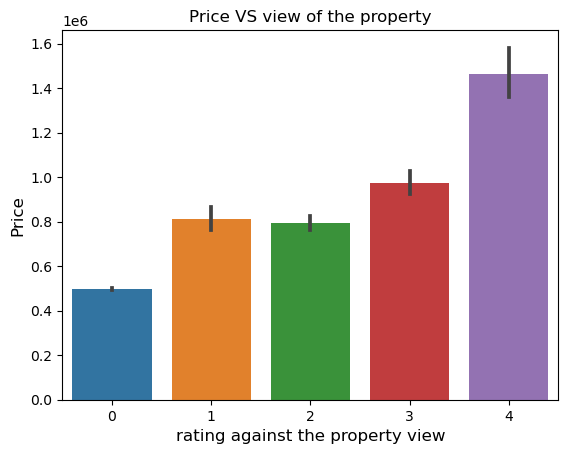

In [52]:
sns.barplot(x=df_houses['view'],y = df_houses['price']) 
plt.title('Price VS view of the property',fontsize = 12)
plt.xlabel('rating against the property view',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - An index from 0 to 4 of how good the view of the property was
 - The price of the house is highest when the rating against the view of the property is high i.e 4

#### Price against the waterfront view

Text(0, 0.5, 'Price')

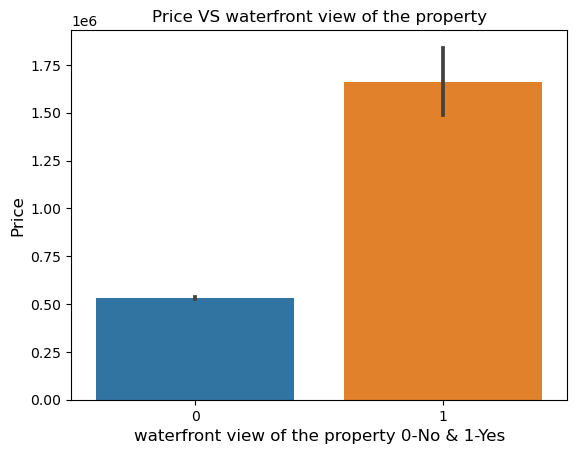

In [53]:
sns.barplot(x=df_houses['waterfront'],y = df_houses['price']) 
plt.title('Price VS waterfront view of the property',fontsize = 12)
plt.xlabel('waterfront view of the property 0-No & 1-Yes',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - Propety with the overlooking the waterfront view is having the high prices against the property is not overlooking the waterfront view.

In [54]:
# Extarcting month from the date column for further processing
df_houses['month'] = df_houses['date'].dt.month

#### Price against the houses sold in a month

Text(0, 0.5, 'Price')

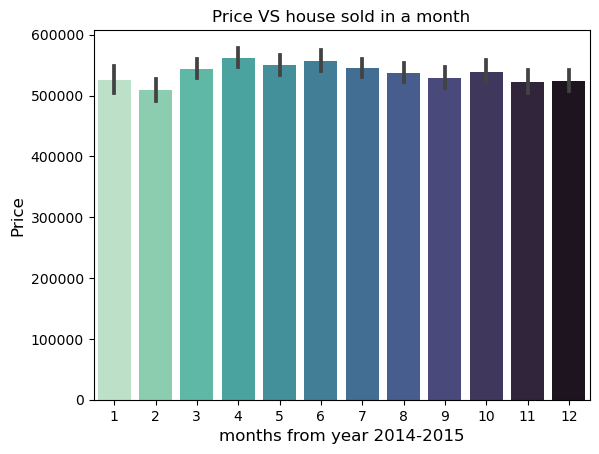

In [55]:
sns.barplot(x=df_houses['month'],y=df_houses['price'],palette='mako_r')
plt.title('Price VS house sold in a month',fontsize = 12)
plt.xlabel('months from year 2014-2015',fontsize = 12)
plt.ylabel('Price',fontsize = 12)

 - Only February month shows the lowest selling price of houses.

## 3. Data Preprocessing

#### 1. Feature Engineering

In [56]:
df_houses["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [57]:
df_houses['yr_built'].head()

0    1955
1    1951
2    1933
3    1965
4    1987
Name: yr_built, dtype: int64

In [58]:
# Calculating age of house when it was sold
df_houses["house_age"] = df_houses["date"].dt.year - df_houses['yr_built']

In [59]:
df_houses['house_age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: house_age, Length: 21597, dtype: int64

In [60]:
# Converting yr-renovated column to renovaed yes or no combination for further processing
df_houses['renovated'] = df_houses['yr_renovated'].apply(lambda year: 0 if year == 0 else 1)

In [61]:
df_houses['renovated'].value_counts()

0    20683
1      914
Name: renovated, dtype: int64

 - There are only **914** houses were **renovated**.

In [62]:
# Dropping 'date','yr_renovated','yr_built','month','zipcode' and 'id' columns for model building
df_houses_2 = df_houses.copy()
df_houses_2.drop(['date','yr_renovated','yr_built','month','zipcode','id'],axis=1 ,inplace=True)

In [63]:
# Converting 'sqft_basement' column values to yes or no binary classification for further processing
df_houses_2['sqft_basement']=df_houses_2['sqft_basement'].apply(lambda is_basment: 0 if is_basment == 0 else 1)

In [64]:
df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  float64
 3   sqft_lot       21597 non-null  float64
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  float64
 14  sqft_lot15     21597 non-null  float64
 15  price          21597 non-null  int64  
 16  house_age      21597 non-null  int64  
 17  renovated      21597 non-null  int64  
dtypes: flo

In [65]:
# Checking sample data after preprocessing
df_houses_2.sample(5)

bedrooms  bathrooms  sqft_living     sqft_lot  floors  waterfront  \
7155          3       1.75    145.85771  1016.265917     1.0           0   
20027         5       4.00    156.07704   675.219004     1.0           0   
8669          3       2.50    136.56741   416.948664     2.0           0   
12286         4       4.50    357.67655  1258.928553     2.0           0   
3191          5       2.50    308.43796   675.033198     2.0           0   

       view  condition  grade  sqft_above  sqft_basement      lat     long  \
7155      0          3      8   111.48360              1  47.6389 -122.102   
20027     0          3      8   127.27711              1  47.5571 -122.356   
8669      0          5      7   136.56741              0  47.7230 -122.162   
12286     2          3     10   278.70900              1  47.5522 -122.103   
3191      0          3      9   308.43796              0  47.5862 -122.054   

       sqft_living15  sqft_lot15   price  house_age  renovated  
7155       163.50928  947.610600  515000         40          0  
20027      189.52212  767.285877  545000          7          0  
8669       130.06420  412.582223  399950         34          0  
12286      323.30244  997.499511  995000         16          0  
3191       284.28318  954.020907  805000         15          0

### 2. Feature Transformation

#### 1. Spliting

In [66]:
# Defining X and y variables
X = df_houses_2.drop(['price'],axis=1) # Independent variables
y = df_houses_2['price'] # Target variable

In [67]:
X

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  view  \
0             3       1.00    109.62554  524.901950     1.0           0     0   
1             3       2.25    238.76071  672.803526     2.0           0     0   
2             2       1.00     71.53531  929.030000     1.0           0     0   
3             4       3.00    182.08988  464.515000     1.0           0     0   
4             3       2.00    156.07704  750.656240     1.0           0     0   
...         ...        ...          ...         ...     ...         ...   ...   
21592         3       2.50    142.14159  105.073293     3.0           0     0   
21593         4       2.50    214.60593  540.045139     2.0           0     0   
21594         2       0.75     94.76106  125.419050     2.0           0     0   
21595         3       2.50    148.64480  221.852364     2.0           0     0   
21596         2       0.75     94.76106   99.963628     2.0           0     0   

       condition  grade  sqft_above  sqft_basement      lat     long  \
0              3      7   109.62554              0  47.5112 -122.257   
1              3      7   201.59951              1  47.7210 -122.319   
2              3      6    71.53531              0  47.7379 -122.233   
3              5      7    97.54815              1  47.5208 -122.393   
4              3      8   156.07704              0  47.6168 -122.045   
...          ...    ...         ...            ...      ...      ...   
21592          3      8   142.14159              0  47.6993 -122.346   
21593          3      8   214.60593              0  47.5107 -122.362   
21594          3      7    94.76106              0  47.5944 -122.299   
21595          3      8   148.64480              0  47.5345 -122.069   
21596          3      7    94.76106              0  47.5941 -122.299   

       sqft_living15  sqft_lot15  house_age  renovated  
0          124.49002  524.901950         59          0  
1          157.00607  709.686017         63          1  
2          252.69616  748.983986         82          0  
3          126.34808  464.515000         49          0  
4          167.22540  697.051209         28          0  
...              ...         ...        ...        ...  
21592      142.14159  140.190627          5          0  
21593      170.01249  668.901600          1          0  
21594       94.76106  186.456321          5          0  
21595      130.99323  119.566161         11          0  
21596       94.76106  126.069371          6          0  

[21597 rows x 17 columns]

In [68]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [69]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [70]:
X_train

bedrooms  bathrooms  sqft_living     sqft_lot  floors  waterfront  \
2093          4       2.00    197.88339   260.128400     1.0           0   
9738          3       1.00    107.76748   343.741100     1.5           0   
4382          3       1.75    169.08346  1446.499710     1.0           0   
11641         3       1.75    154.21898   771.187803     1.0           0   
13114         2       2.25    129.13517   113.527466     3.0           0   
...         ...        ...          ...          ...     ...         ...   
11532         5       1.75    232.25750  1079.254151     1.0           0   
16065         4       2.50    274.99288   469.531762     2.0           0   
14501         2       1.00    117.98681   297.289600     1.0           0   
14555         3       1.00    130.06420   473.805300     1.5           0   
11590         5       3.25    311.22505   371.612000     2.0           0   

       view  condition  grade  sqft_above  sqft_basement      lat     long  \
2093      0          5      7    99.40621              1  47.6545 -122.333   
9738      0          3      7   107.76748              0  47.5651 -122.359   
4382      2          3      8   169.08346              0  47.5068 -122.386   
11641     0          5      7   154.21898              0  47.7647 -122.263   
13114     0          3      7   124.49002              1  47.6754 -122.121   
...     ...        ...    ...         ...            ...      ...      ...   
11532     0          4      9   144.92868              1  47.5361 -122.217   
16065     0          3      9   274.99288              0  47.3601 -122.035   
14501     0          4      7    89.18688              1  47.6565 -122.348   
14555     0          3      7   130.06420              0  47.6677 -122.333   
11590     0          4      8   233.18653              1  47.6645 -122.291   

       sqft_living15   sqft_lot15  house_age  renovated  
2093       184.87697   370.682970         92          0  
9738       124.49002   348.386250        105          0  
4382       231.32847   880.720440         67          0  
11641      154.21898   881.556567         59          0  
13114      137.49644   127.184207          5          0  
...              ...          ...        ...        ...  
11532      313.08311  1079.254151         48          0  
16065      274.99288   464.515000          8          0  
14501      130.99323   122.631960         94          0  
14555      161.65122   284.283180        115          0  
11590      150.50286   371.612000         17          0  

[17277 rows x 17 columns]

In [71]:
X_train.shape

(17277, 17)

In [72]:
X_test

bedrooms  bathrooms  sqft_living      sqft_lot  floors  waterfront  \
2398          3       1.00     88.25785    418.063500     1.0           0   
14724         2       1.00    110.55457    575.998600     1.0           0   
20980         4       3.00    512.82456    772.302639     2.0           0   
12156         3       2.00    183.94794   1128.771450     1.0           0   
19485         2       1.75    173.72861    615.482375     1.0           0   
...         ...        ...          ...           ...     ...         ...   
4328          2       1.00    104.05136  20234.273400     1.0           0   
3379          4       2.50    305.65087   3251.697903     2.0           0   
10909         4       1.00    148.64480    418.063500     1.5           0   
16015         4       2.50    294.50251    992.947264     2.0           0   
3102          4       1.75    170.01249   1165.003620     1.0           0   

       view  condition  grade  sqft_above  sqft_basement      lat     long  \
2398      0          4      6    88.25785              0  47.5273 -122.265   
14724     0          3      7   110.55457              0  47.7634 -122.340   
20980     3          3      9   331.66371              1  47.5655 -122.129   
12156     0          3      9   183.94794              0  47.3657 -122.152   
19485     0          3      7    89.18688              1  47.5071 -122.249   
...     ...        ...    ...         ...            ...      ...      ...   
4328      0          3      6   104.05136              0  47.7378 -121.912   
3379      0          3     10   305.65087              0  47.7231 -122.038   
10909     0          4      7   148.64480              0  47.6804 -122.316   
16015     2          3      9   294.50251              0  47.3179 -122.257   
3102      0          4      8   104.98039              1  47.3348 -122.324   

       sqft_living15    sqft_lot15  house_age  renovated  
2398       105.90942    418.063500         72          0  
14724      136.56741    724.643400         66          0  
20980      350.24431    769.051034          6          0  
12156      204.38660   1128.771450         20          0  
19485      156.07704    557.418000         67          0  
...              ...           ...        ...        ...  
4328       137.49644  20234.273400         38          0  
3379       379.97327   3750.587013         24          0  
10909      159.79316    418.063500         89          0  
16015      287.99930   1171.506830         13          0  
3102       187.66406   1165.003620         57          0  

[4320 rows x 17 columns]

In [73]:
X_test.shape

(4320, 17)

In [74]:
y_train

2093      800000
9738      315000
4382      700000
11641     434000
13114     465000
          ...   
11532     840000
16065     385000
14501     355000
14555     887200
11590    1110000
Name: price, Length: 17277, dtype: int64

In [75]:
y_train.shape

(17277,)

In [76]:
y_test

2398      325000
14724     295950
20980    1270000
12156     479900
19485     229500
          ...   
4328      290000
3379      783350
10909     725000
16015     455000
3102      283200
Name: price, Length: 4320, dtype: int64

In [77]:
y_test.shape

(4320,)

#### 2. Scalling

In [78]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test=scalar.transform(X_test)

In [79]:
X_train

array([[ 0.66881048, -0.15489451,  0.04969084, ..., -0.3263716 ,
         1.6568485 , -0.21450687],
       [-0.40378199, -1.44973541, -1.0030376 , ..., -0.33521649,
         2.09887301, -0.21450687],
       [-0.40378199, -0.47860473, -0.28674814, ..., -0.12404464,
         0.80680136, -0.21450687],
       ...,
       [-1.47637446, -1.44973541, -0.88365602, ..., -0.42477105,
         1.72485227, -0.21450687],
       [-0.40378199, -1.44973541, -0.7425687 , ..., -0.36064556,
         2.43889187, -0.21450687],
       [ 1.74140296,  1.46365662,  1.37374105, ..., -0.32600306,
        -0.89329293, -0.21450687]])

In [80]:
X_test

array([[-0.40378199, -1.44973541, -1.23094788, ..., -0.3075762 ,
         0.97681079, -0.21450687],
       [-1.47637446, -1.44973541, -0.97047899, ..., -0.1859589 ,
         0.77279947, -0.21450687],
       [ 0.66881048,  1.13994639,  3.72881396, ..., -0.16834282,
        -1.26731367, -0.21450687],
       ...,
       [ 0.66881048, -1.44973541, -0.52551129, ..., -0.3075762 ,
         1.55484284, -0.21450687],
       [ 0.66881048,  0.49252594,  1.17838938, ..., -0.00869248,
        -1.02930047, -0.21450687],
       [ 0.66881048, -0.47860473, -0.27589527, ..., -0.01127224,
         0.4667825 , -0.21450687]])

## 4. Modelling and Evalution

#### 1. Modeling

In [1]:
# installing xgboost
pip install xgboost==0.90

                                              0.0/18.3 MB ? eta -:--:--
                                              0.5/18.3 MB 13.8 MB/s eta 0:00:02
     --                                       0.9/18.3 MB 11.8 MB/s eta 0:00:02
     -----                                    2.7/18.3 MB 19.4 MB/s eta 0:00:01
     ------                                   2.9/18.3 MB 18.4 MB/s eta 0:00:01
     -------                                  3.3/18.3 MB 14.1 MB/s eta 0:00:02
     --------                                 4.0/18.3 MB 14.1 MB/s eta 0:00:02
     ----------                               4.7/18.3 MB 14.4 MB/s eta 0:00:01
     ------------                             5.6/18.3 MB 14.8 MB/s eta 0:00:01
     --------------                           6.6/18.3 MB 15.6 MB/s eta 0:00:01
     -----------------                        7.9/18.3 MB 16.7 MB/s eta 0:00:01
     --------------------                     9.4/18.3 MB 18.2 MB/s eta 0:00:01
     ----------------------                  10.


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
# importing liabraires for modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [82]:
# Creating dictonary with the list of models and it's parameters as values
models  = {
    "LR" : LinearRegression(),
    "XGB" : XGBRegressor(n_estimators=1000,n_jobs=-1,objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10),
    "KNN" : KNeighborsRegressor(n_neighbors=3),
    "Random_Forest" : RandomForestRegressor(n_estimators=1000,n_jobs=-1)
}

In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve

Using model: LR
Training Score: 0.6941503636016507
Test Score: 0.7029902070933554
R2 =  0.7029902070933554
RMSE =  199176.5897774576
The value of the metric MSE is  39671313915.37762
MAE =  123795.37258142281
Adjusted R2 =  -14584.201266781112


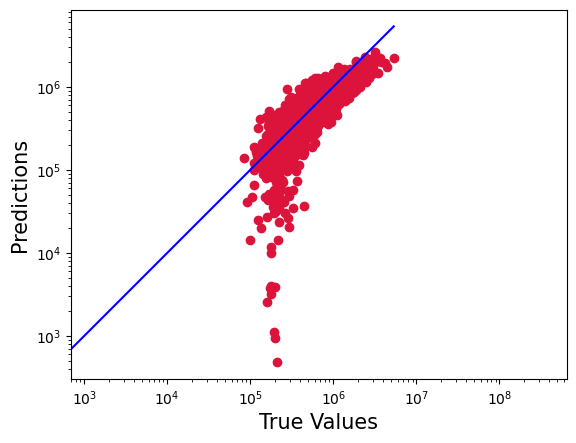

----------------------------------------------------------------------------------------------------
Using model: XGB
Training Score: 0.9802126199110384
Test Score: 0.912134637477782
R2 =  0.912134637477782
RMSE =  108333.24706212469
The value of the metric MSE is  11736092419.023348
MAE =  64770.74704680266
Adjusted R2 =  -57.60330728886835


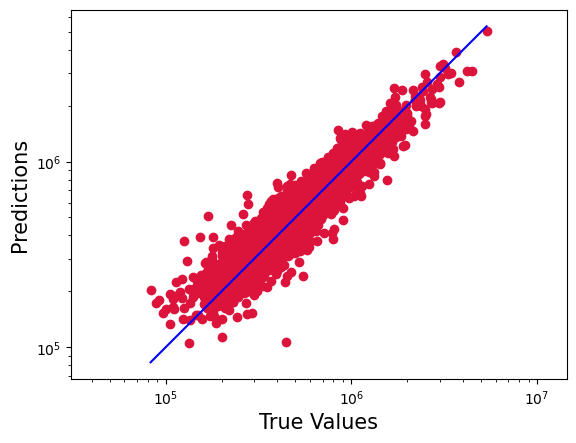

----------------------------------------------------------------------------------------------------
Using model: KNN
Training Score: 0.8942094372045594
Test Score: 0.7890268813173794
R2 =  0.7890268813173794
RMSE =  167867.44068758146
The value of the metric MSE is  28179477642.998684
MAE =  91384.47986111112
Adjusted R2 =  -3.3420458222609133


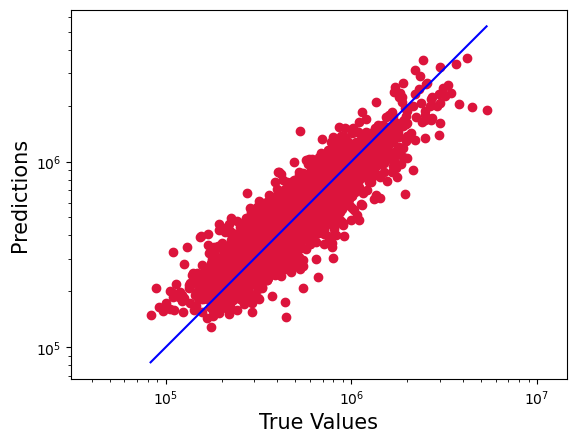

----------------------------------------------------------------------------------------------------
Using model: Random_Forest
Training Score: 0.9832091405324943
Test Score: 0.8907114553770286
R2 =  0.8907114553770286
RMSE =  120820.38883626254
The value of the metric MSE is  14597566358.545673
MAE =  67363.47192703208
Adjusted R2 =  -177.0131463439034


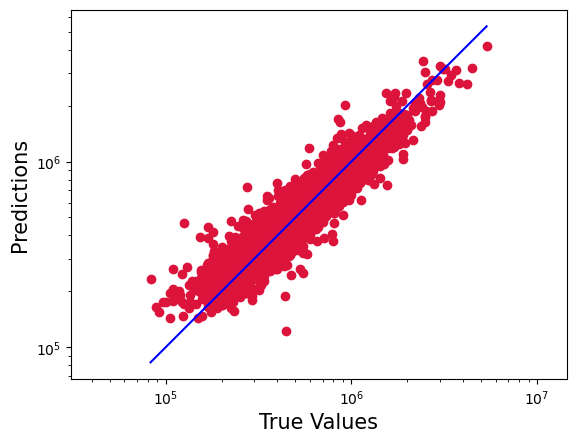

----------------------------------------------------------------------------------------------------


In [84]:
# for loop for different regression models
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}') 
    predictions= model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    adj_r2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("R2 = ", r2)
    print("RMSE = ", RMSE)
    print("The value of the metric MSE is ", MSE)
    print("MAE = ", MAE)
    print("Adjusted R2 = ",adj_r2)
    # plotting a regression line
    plt.scatter(y_test, predictions, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(predictions), max(y_test))
    p2 = min(min(predictions), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    print('--'*50)    


# Modeling with scaling discrete variables

In [85]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'renovated'],
      dtype='object')

In [86]:
X.head()

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  view  \
0         3       1.00    109.62554  524.901950     1.0           0     0   
1         3       2.25    238.76071  672.803526     2.0           0     0   
2         2       1.00     71.53531  929.030000     1.0           0     0   
3         4       3.00    182.08988  464.515000     1.0           0     0   
4         3       2.00    156.07704  750.656240     1.0           0     0   

   condition  grade  sqft_above  sqft_basement      lat     long  \
0          3      7   109.62554              0  47.5112 -122.257   
1          3      7   201.59951              1  47.7210 -122.319   
2          3      6    71.53531              0  47.7379 -122.233   
3          5      7    97.54815              1  47.5208 -122.393   
4          3      8   156.07704              0  47.6168 -122.045   

   sqft_living15  sqft_lot15  house_age  renovated  
0      124.49002  524.901950         59          0  
1      157.00607  709.686017         63          1  
2      252.69616  748.983986         82          0  
3      126.34808  464.515000         49          0  
4      167.22540  697.051209         28          0

In [87]:
# Seperating discrete numerical columns from X for further processing
X_dis_num = X.drop(['sqft_living','sqft_lot','sqft_above',
                       'lat','long','sqft_living15','sqft_lot15'],axis=1)

In [88]:
X_dis_num.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0         3       1.00     1.0           0     0          3      7   
1         3       2.25     2.0           0     0          3      7   
2         2       1.00     1.0           0     0          3      6   
3         4       3.00     1.0           0     0          5      7   
4         3       2.00     1.0           0     0          3      8   

   sqft_basement  house_age  renovated  
0              0         59          0  
1              1         63          1  
2              0         82          0  
3              1         49          0  
4              0         28          0

In [89]:
# Seperating the continous numerical columns from X to applay transformations
X_con_num = X[['sqft_living','sqft_lot','sqft_above',
                       'lat','long','sqft_living15','sqft_lot15']]
X_con_num

sqft_living    sqft_lot  sqft_above      lat     long  sqft_living15  \
0        109.62554  524.901950   109.62554  47.5112 -122.257      124.49002   
1        238.76071  672.803526   201.59951  47.7210 -122.319      157.00607   
2         71.53531  929.030000    71.53531  47.7379 -122.233      252.69616   
3        182.08988  464.515000    97.54815  47.5208 -122.393      126.34808   
4        156.07704  750.656240   156.07704  47.6168 -122.045      167.22540   
...            ...         ...         ...      ...      ...            ...   
21592    142.14159  105.073293   142.14159  47.6993 -122.346      142.14159   
21593    214.60593  540.045139   214.60593  47.5107 -122.362      170.01249   
21594     94.76106  125.419050    94.76106  47.5944 -122.299       94.76106   
21595    148.64480  221.852364   148.64480  47.5345 -122.069      130.99323   
21596     94.76106   99.963628    94.76106  47.5941 -122.299       94.76106   

       sqft_lot15  
0      524.901950  
1      709.686017  
2      748.983986  
3      464.515000  
4      697.051209  
...           ...  
21592  140.190627  
21593  668.901600  
21594  186.456321  
21595  119.566161  
21596  126.069371  

[21597 rows x 7 columns]

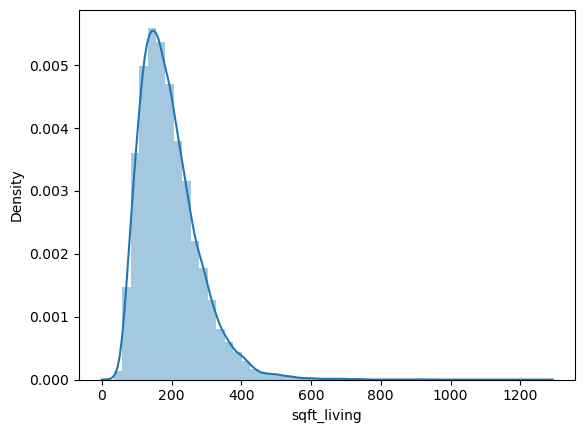

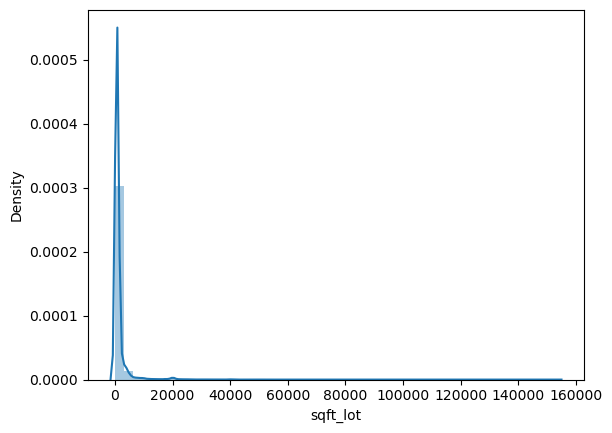

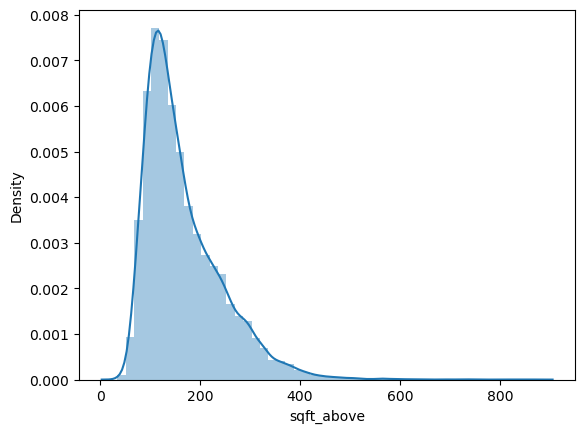

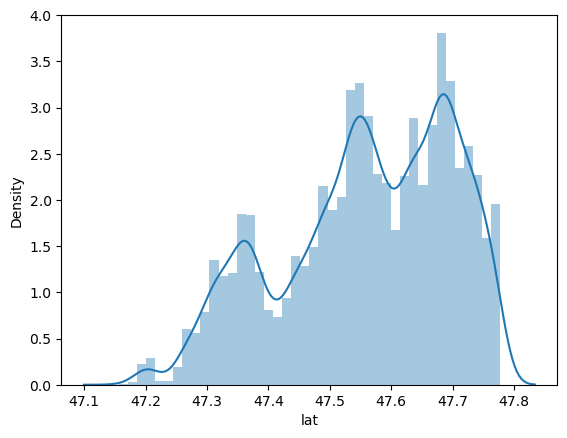

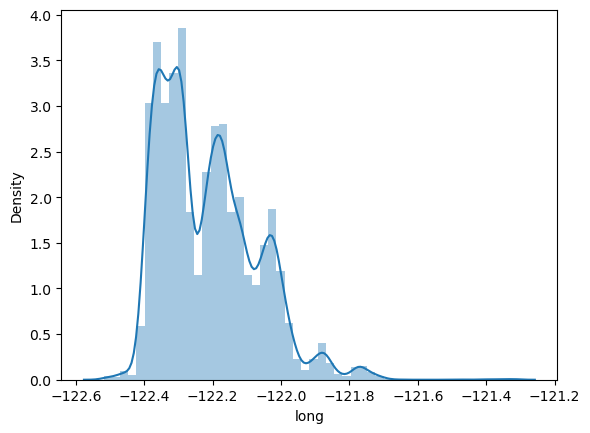

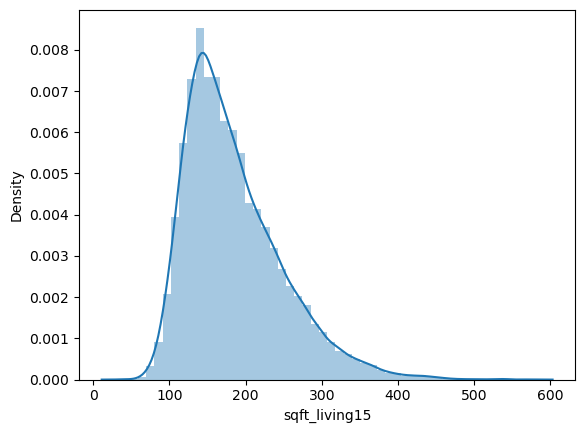

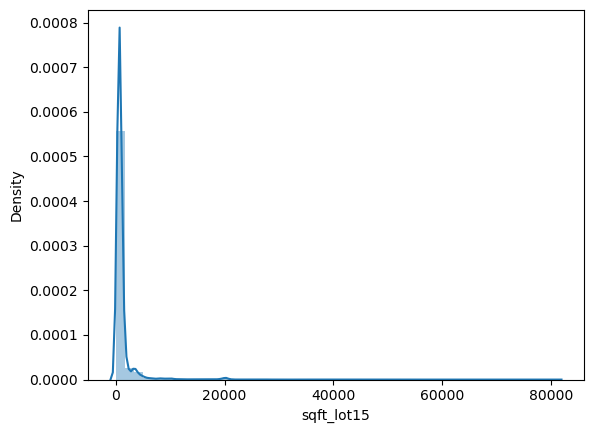

In [90]:
# Plotting the distribution before transforming continous variables
for column in X_con_num.columns:
    sns.distplot(X_con_num[column])
    plt.show()

In [91]:
# Importing liabraries for power transformation
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame

In [92]:
# Applying yeo-johnson transformation on continous variables using power-transformation 
pt = PowerTransformer(method='yeo-johnson')
X_con_num1 = pt.fit_transform(X_con_num)

In [93]:
# Converting transformed data into data frame for futher processing
X_con_num_df = DataFrame(X_con_num1,columns=X_con_num.columns)

In [94]:
X_con_num_df.head()

sqft_living  sqft_lot  sqft_above       lat      long  sqft_living15  \
0    -1.124787 -0.331967   -0.737780 -0.476120 -0.277367      -1.043720   
1     0.707457 -0.032141    0.706066  1.266489 -0.752410      -0.294351   
2    -2.114899  0.336687   -1.881735  1.438418 -0.098118       1.122111   
3     0.066050 -0.484941   -1.039251 -0.410249 -1.342732      -0.994676   
4    -0.297184  0.095601    0.125169  0.316908  1.221071      -0.097552   

   sqft_lot15  
0   -0.342226  
1    0.057981  
2    0.126921  
3   -0.511571  
4    0.034832

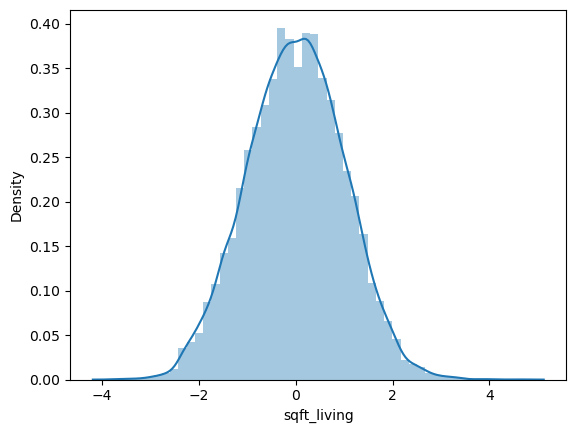

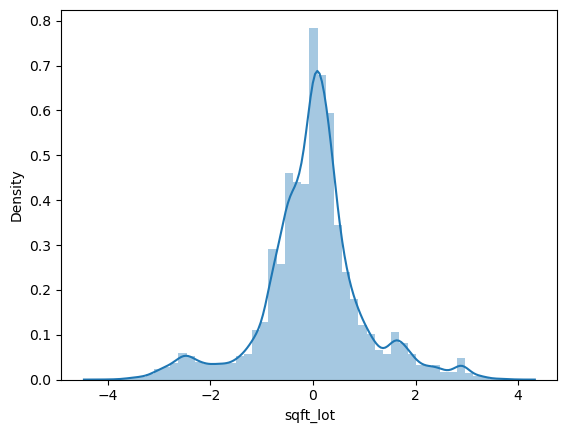

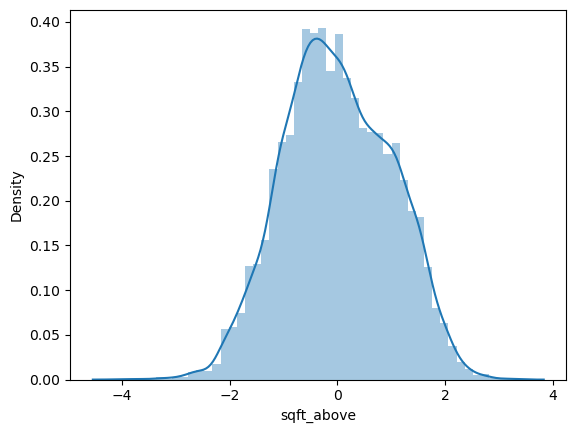

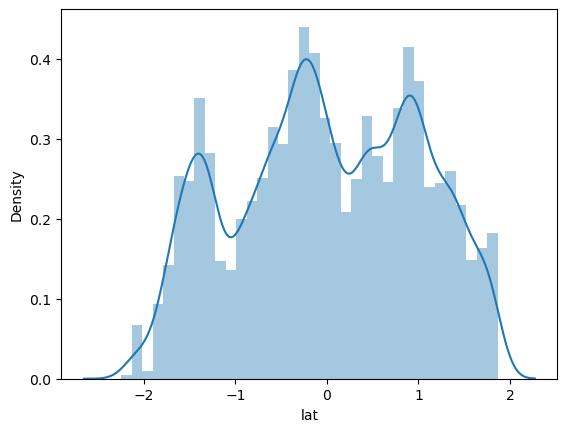

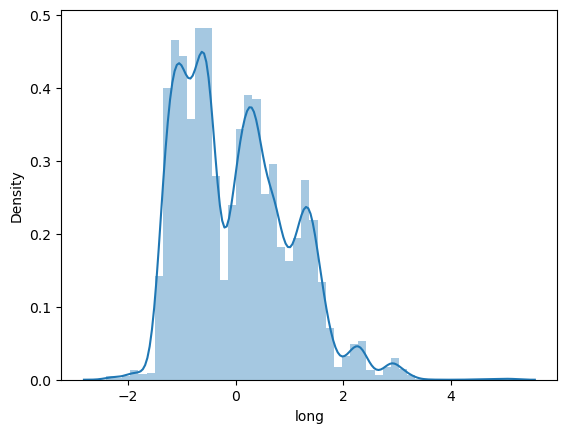

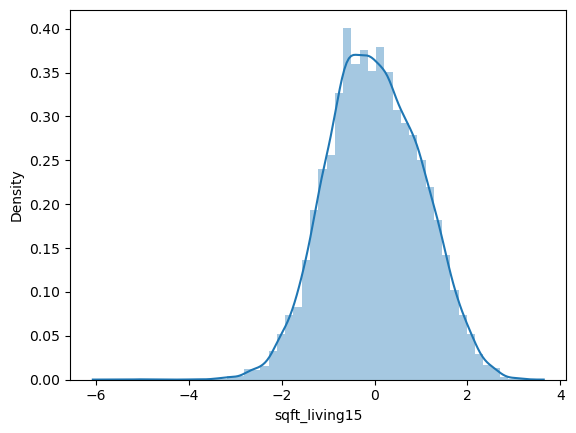

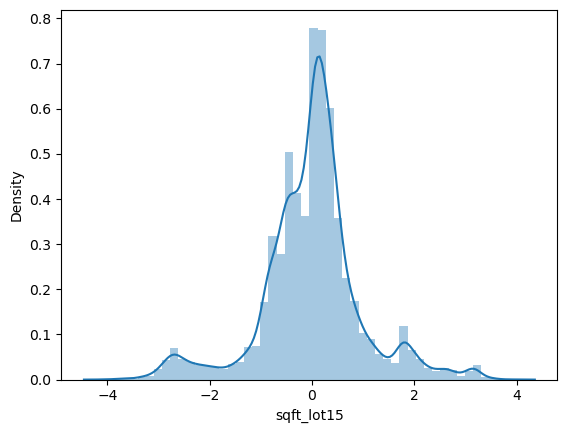

In [95]:
# Plotting the distribution after transforming continous variables
for column in X_con_num_df.columns:
    sns.distplot(X_con_num_df[column])
    plt.show()

In [96]:
# Concatinating the X-discrete-numerical and X-continous-numerical 
X1 = pd.concat([X_dis_num,X_con_num_df], axis=1)

In [97]:
X1.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0         3       1.00     1.0           0     0          3      7   
1         3       2.25     2.0           0     0          3      7   
2         2       1.00     1.0           0     0          3      6   
3         4       3.00     1.0           0     0          5      7   
4         3       2.00     1.0           0     0          3      8   

   sqft_basement  house_age  renovated  sqft_living  sqft_lot  sqft_above  \
0              0         59          0    -1.124787 -0.331967   -0.737780   
1              1         63          1     0.707457 -0.032141    0.706066   
2              0         82          0    -2.114899  0.336687   -1.881735   
3              1         49          0     0.066050 -0.484941   -1.039251   
4              0         28          0    -0.297184  0.095601    0.125169   

        lat      long  sqft_living15  sqft_lot15  
0 -0.476120 -0.277367      -1.043720   -0.342226  
1  1.266489 -0.752410      -0.294351    0.057981  
2  1.438418 -0.098118       1.122111    0.126921  
3 -0.410249 -1.342732      -0.994676   -0.511571  
4  0.316908  1.221071      -0.097552    0.034832

In [98]:
y.head() # target column = 'price'

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [99]:
# Splitting data into training and testing sets
X1_train , X1_test, y1_train , y1_test = train_test_split(X1,y,test_size=0.3,random_state=40)

Models with scaling only on continous numerical columns.
Using model: LR
Training Score: 0.6473608856711517
Test Score: 0.6594237134724696
R2 =  0.6594237134724696
RMSE =  213820.64931904437
The value of the metric MSE is  45719270075.21775
MAE =  132363.7087010872


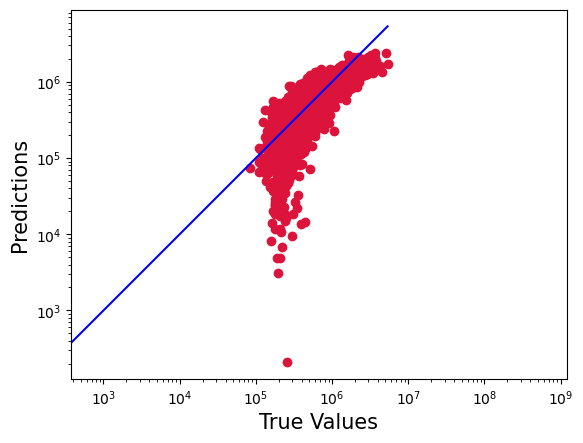

----------------------------------------------------------------------------------------------------
Using model: XGB
Training Score: 0.9822370127996095
Test Score: 0.9097091552454643
R2 =  0.9097091552454643
RMSE =  110094.16432309749
The value of the metric MSE is  12120725018.001192
MAE =  65248.1115234375


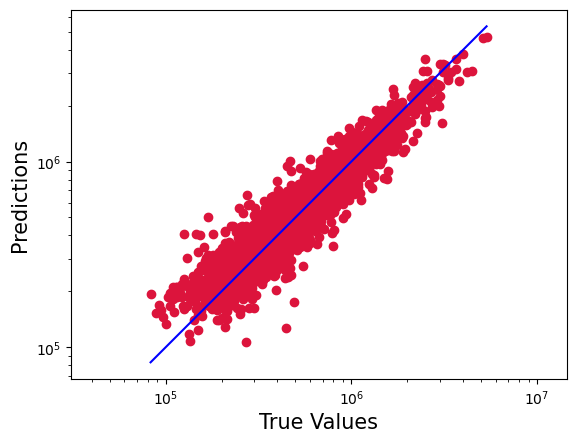

----------------------------------------------------------------------------------------------------
Using model: KNN
Training Score: 0.8697904628803841
Test Score: 0.7427177809960536
R2 =  0.7427177809960536
RMSE =  185843.4792733203
The value of the metric MSE is  34537798788.41303
MAE =  100312.14444444445


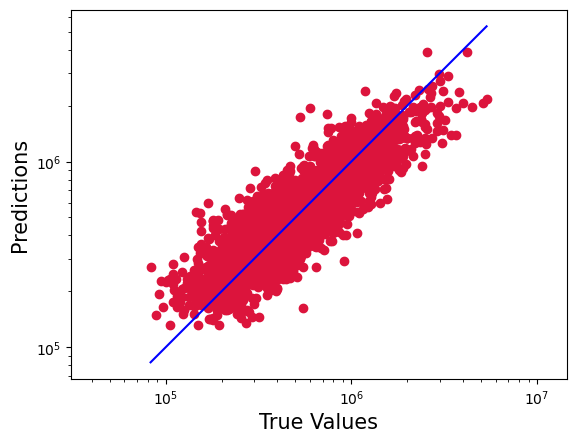

----------------------------------------------------------------------------------------------------
Using model: Random_Forest
Training Score: 0.9819649525252038
Test Score: 0.8922199280669005
R2 =  0.8922199280669005
RMSE =  120285.05626746934
The value of the metric MSE is  14468494761.268265
MAE =  67900.94834658473


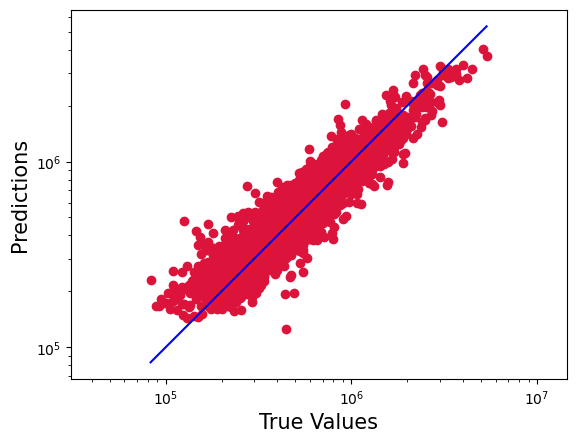

----------------------------------------------------------------------------------------------------


In [114]:
# for loop to predict the R2 for different regression models with scaling only on continous numerical
print('Models with scaling only on continous numerical columns.')
for name, model1 in models.items():
    print(f'Using model: {name}')
    model1.fit(X1_train, y1_train)  
    print(f'Training Score: {model1.score(X1_train, y1_train)}')
    print(f'Test Score: {model1.score(X1_test, y1_test)}')
    predictions1= model1.predict(X1_test)
    r2 = r2_score(y1_test, predictions1)
    RMSE = mean_squared_error(y1_test, predictions1, squared=False)
    MSE = mean_squared_error(y1_test, predictions1)
    MAE = mean_absolute_error(y1_test, predictions1)
    print("R2 = ", r2)
    print("RMSE = ", RMSE)
    print("The value of the metric MSE is ", MSE)
    print("MAE = ", MAE)
    # Plotting a regression line
    plt.scatter(y1_test, predictions1, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(predictions1), max(y1_test))
    p2 = min(min(predictions1), min(y1_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    print('--'*50) 

### Finding the best features affecting the house price

### Conclusions :

Together, 'sqft_living','sqft_above','bathrooms','sqft_living15','grade'and 'view' features are the best predictors of a house's price. The model does have some limitations: given that some of the variables needed to be transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. 

From the above predictions we can say that **XGBOOST** is the best algorithm to predict the house's price.

REFERENCES :
 - https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
 - https://machinelearningmastery.com/xgboost-for-regression/
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 - https://towardsdatascience.com/random-forest-regression-5f605132d19d
 - https://www.nvidia.com/en-us/glossary/data-science/xgboost/
 - https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
 
#### Future enhancement:
 - Will try to collect more data like house location, public transport connectivity, etc to predict the most accurate house price
 - Will use hyperparameter tuning to pass the most accurate variables to the model
 - Will try with different models like SVM 